In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('friut.csv')

In [3]:
data['fruit_name'].value_counts()

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

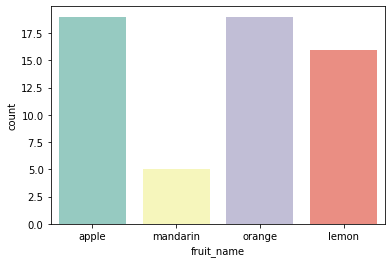

In [4]:
sns.countplot(data['fruit_name'], label='Count', palette='Set3')
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [6]:
X = data[['mass','width', 'height', 'color_score']]
y = data['fruit_name']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


In [7]:
X_train.describe()

,mass,width,height,color_score
count,47.000000,47.000000,47.000000,47.000000
mean,160.170213,7.061702,7.661702,0.760638
std,51.830543,0.814956,1.329196,0.072424
min,76.000000,5.800000,4.000000,0.550000
25%,131.000000,6.250000,7.250000,0.720000
50%,158.000000,7.200000,7.600000,0.750000
75%,176.000000,7.500000,8.200000,0.810000
max,356.000000,9.200000,10.500000,0.920000


In [8]:
X_test.describe()

,mass,width,height,color_score
count,12.000000,12.000000,12.000000,12.000000
mean,174.666667,7.275000,7.816667,0.771667
std,67.410996,0.837882,1.535539,0.095426
min,84.000000,6.000000,4.600000,0.600000
25%,141.500000,7.050000,7.175000,0.717500
50%,160.000000,7.150000,7.550000,0.750000
75%,180.500000,7.325000,8.225000,0.810000
max,362.000000,9.600000,10.300000,0.930000


In [9]:
kn = KNeighborsClassifier()

kn.fit(X_train, y_train)

KNeighborsClassifier()

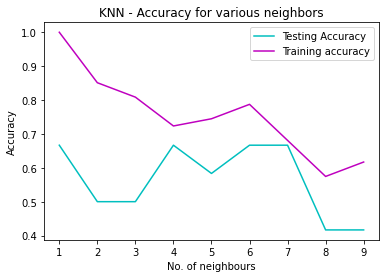

<Figure size 432x288 with 0 Axes>

In [10]:
neighbours = np.arange(1,10)
training_accuracy = np.empty(len(neighbours))
testing_accuracy = np.empty(len(neighbours))

for i in range(len(neighbours)):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(X_train,y_train)
    training_accuracy[i] = knn.score(X_train,y_train)
    testing_accuracy[i] = knn.score(X_test,y_test)

plt.title('KNN - Accuracy for various neighbors')
plt.plot(neighbours, testing_accuracy, label = 'Testing Accuracy', color ='c')
plt.plot(neighbours, training_accuracy, label = 'Training accuracy', color ='m')
plt.legend()
plt.xlabel('No. of neighbours')
plt.ylabel('Accuracy')
plt.show()

In [11]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mp
from sklearn import neighbors, datasets


In [15]:
fruit = datasets.load_iris()
X = fruit.data[:,:2]
y = fruit.target
h = 0.2
n_neighbors = 7

In [16]:
cmap_light = ListedColormap(['DEEPSKYBLUE', 'GREENYELLOW', 'LIGHTSALMON'])
cmap_bold = ListedColormap(['GOLD', '#228B22', '#0000FF'])

/home/kunalsirpor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':


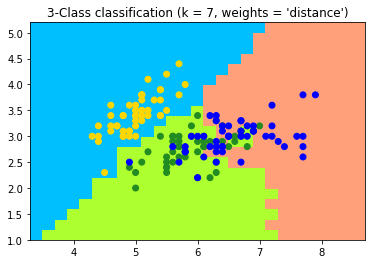

In [20]:
for weights in ['distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

   
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" %(n_neighbors, weights))
plt.show()